In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pylab import *
import matplotlib
#import plplot
from scipy import stats
#from io import StringIO
print(pd.__version__)
#AttributeError: 'Series' object has no attribute 'to_numpy'
import re

import math
import astropy as astro
import scipy.ndimage as spimage
from astropy.io import fits, ascii
from astropy.table import Table, join
from astropy.cosmology import WMAP9 as cosmo
import matplotlib as mpl
#from numpy import std as biweight_midvariance
import matplotlib.cm as cm

from scipy import optimize
from scipy.stats import gaussian_kde
from matplotlib import colors
import scipy.ndimage as ndimage
from collections import Counter
from matplotlib.legend import Legend
import matplotlib.patches as patches
from matplotlib import pyplot
#
#
#
import extinction


#
# seaborn
#import pandas.util.testing as tm
import seaborn as sns

#
# Jorge
#

from sel2dhist_xy import sel2dhist_xy


#
# 3D plots!
#
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#biweight_midvariance


import warnings
warnings.simplefilter("ignore")

#
# my_utils
#
from my_utils import *

#
#
#
from ndtest import *
from sklearn.decomposition import PCA

#
#
#
from scipy.optimize import leastsq, fmin
import matplotlib.animation as animation

#
# Carlos Color map
#
from cmaps_CLC import vel_map

def search_col(tab,key):
    for cols in tab.columns:
        if (cols.find(key)>-1):
            print(cols)


1.1.1
1.1.1


In [2]:
def remove_rows_with_repeated_keys(table: Table, key_column: str) -> Table:
    # Count occurrences of each key
    keys, counts = np.unique(table[key_column], return_counts=True)
    
    # Find keys that are unique (count == 1)
    unique_keys = keys[counts == 1]
    
    # Create a mask to keep only rows with unique keys
    mask = np.isin(table[key_column], unique_keys)
    
    # Return filtered table
    return table[mask]

def drop_later_duplicates_keep_first(table: Table, key_column: str) -> Table:
    seen = set()
    keep_rows = []

    for i, key in enumerate(table[key_column]):
        if key not in seen:
            seen.add(key)
            keep_rows.append(i)

    return table[keep_rows]

In [3]:
from matplotlib import rcParams as rc
rc.update({'font.size': 20,\
           'font.weight': 900,\
           'text.usetex': True,\
           'path.simplify'           :   True,\
           'xtick.labelsize' : 20,\
           'ytick.labelsize' : 20,\
#           'xtick.major.size' : 3.5,\
#           'ytick.major.size' : 3.5,\
           'axes.linewidth'  : 2.0,\
               # Increase the tick-mark lengths (defaults are 4 and 2)
           'xtick.major.size'        :   6,\
           'ytick.major.size'        :   6,\
           'xtick.minor.size'        :   3,\
           'ytick.minor.size'        :   3,\
           'xtick.major.width'       :   1,\
           'ytick.major.width'       :   1,\
           'lines.markeredgewidth'   :   1,\
           'legend.numpoints'        :   1,\
           'xtick.minor.width'       :   1,\
           'ytick.minor.width'       :   1,\
           'legend.frameon'          :   False,\
           'legend.handletextpad'    :   0.3,\
           'font.family'    :   'serif',\
           'mathtext.fontset'        :   'stix',\
           'axes.facecolor' : "w",\
           
          })


In [4]:
tab_pe = Table.read('tables/KG_Pipe3D_table.fits')
print(len(tab_pe))
tab_pe =  drop_later_duplicates_keep_first(tab_pe,'cubename')
print(len(tab_pe))


451
451


In [5]:
tab_pe

name,cubename,KGAS_ID,IAUNAME,FoV,Re_kpc,e_log_Mass,log_SFR_Ha,e_log_SFR_Ha,log_Mass,log_SFR_ssp,log_NII_Ha_cen,e_log_NII_Ha_cen,log_OIII_Hb_cen,e_log_OIII_Hb_cen,log_SII_Ha_cen,e_log_SII_Ha_cen,log_OII_Hb_cen,e_log_OII_Hb_cen,EW_Ha_cen,e_EW_Ha_cen,ZH_LW_Re_fit,e_ZH_LW_Re_fit,alpha_ZH_LW_Re_fit,e_alpha_ZH_LW_Re_fit,ZH_MW_Re_fit,e_ZH_MW_Re_fit,alpha_ZH_MW_Re_fit,e_alpha_ZH_MW_Re_fit,Age_LW_Re_fit,e_Age_LW_Re_fit,alpha_Age_LW_Re_fit,e_alpha_Age_LW_Re_fit,Age_MW_Re_fit,e_Age_MW_Re_fit,alpha_Age_MW_Re_fit,e_alpha_Age_MW_Re_fit,Re_arc,DL,DA,PA,ellip,log_Mass_gas,vel_sigma_Re,e_vel_sigma_Re,log_SFR_SF,log_SFR_D_C,OH_O3N2_cen,e_OH_O3N2_cen,OH_N2_cen,e_OH_N2_cen,OH_ONS_cen,e_OH_ONS_cen,OH_R23_cen,e_OH_R23_cen,OH_pyqz_cen,e_OH_pyqz_cen,OH_t2_cen,e_OH_t2_cen,OH_M08_cen,e_OH_M08_cen,OH_T04_cen,e_OH_T04_cen,OH_dop_cen,e_OH_dop_cen,OH_O3N2_EPM09_cen,e_OH_O3N2_EPM09_cen,log_OI_Ha_cen,e_log_OI_Ha_cen,Ha_Hb_cen,e_Ha_Hb_cen,log_NII_Ha_Re,e_log_NII_Ha_Re,log_OIII_Hb_Re,e_log_OIII_Hb_Re,log_SII_Ha_Re,e_log_SII_Ha_Re,log_OII_Hb_Re,e_log_OII_Hb_Re,log_OI_Ha_Re,e_log_OI_Ha_Re,EW_Ha_Re,e_EW_Ha_Re,Ha_Hb_Re,e_Ha_Hb_Re,log_NII_Ha_ALL,e_log_NII_Ha_ALL,log_OIII_Hb_ALL,e_log_OIII_Hb_ALL,log_SII_Ha_ALL,e_log_SII_Ha_ALL,log_OII_Hb_ALL,e_log_OII_Hb_ALL,log_OI_Ha_ALL,e_log_OI_Ha_ALL,EW_Ha_ALL,e_EW_Ha_ALL,Ha_Hb_ALL,Sigma_Mass_cen,e_Sigma_Mass_cen,Sigma_Mass_Re,e_Sigma_Mass_Re,Sigma_Mass_ALL,e_Sigma_Mass_ALL,T30,ZH_T30,ZH_Re_T30,a_ZH_T30,T40,ZH_T40,ZH_Re_T40,a_ZH_T40,T50,ZH_T50,ZH_Re_T50,a_ZH_T50,T60,ZH_T60,ZH_Re_T60,a_ZH_T60,T70,ZH_T70,ZH_Re_T70,a_ZH_T70,T80,ZH_T80,ZH_Re_T80,a_ZH_T80,T90,ZH_T90,ZH_Re_T90,a_ZH_T90,T95,ZH_T95,ZH_Re_T95,a_ZH_T95,T99,ZH_T99,ZH_Re_T99,a_ZH_T99,log_Mass_gas_Av_gas_OH,log_Mass_gas_Av_ssp_OH,vel_ssp_2,e_vel_ssp_2,vel_Ha_2,e_vel_Ha_2,vel_ssp_1,e_vel_ssp_1,vel_Ha_1,e_vel_Ha_1,log_SFR_ssp_100Myr,log_SFR_ssp_10Myr,vel_disp_Ha_cen,vel_disp_ssp_cen,vel_disp_Ha_1Re,vel_disp_ssp_1Re,log_Mass_in_Re,ML_int,ML_avg,F_Ha_cen,e_F_Ha_cen,R50_kpc_V,e_R50_kpc_V,R50_kpc_Mass,e_R50_kpc_Mass,log_Mass_corr_in_R50_V,e_log_Mass_corr_in_R50_V,log_Mass_gas_Av_gas_log_log,Av_gas_Re,e_Av_gas_Re,Av_ssp_Re,e_Av_ssp_Re,Lambda_Re,e_Lambda_Re,u_band_mag,u_band_mag_error,u_band_abs_mag,u_band_abs_mag_error,g_band_mag,g_band_mag_error,g_band_abs_mag,g_band_abs_mag_error,r_band_mag,r_band_mag_error,r_band_abs_mag,r_band_abs_mag_error,i_band_mag,i_band_mag_error,i_band_abs_mag,i_band_abs_mag_error,B_band_mag,B_band_mag_error,B_band_abs_mag,B_band_abs_mag_error,V_band_mag,V_band_mag_error,V_band_abs_mag,V_band_abs_mag_error,RJ_band_mag,RJ_band_mag_error,RJ_band_abs_mag,RJ_band_abs_mag_error,R50,error_R50,R90,error_R90,C,e_C,B-V,error_B-V,B-R,error_B-R,log_Mass_phot,e_log_Mass_phot,V-band_SB_at_Re,error_V-band_SB_at_Re,V-band_SB_at_R_50,error_V-band_SB_at_R_50,flux_[OII]3726.03_Re_fit,e_flux_[OII]3726.03_Re_fit,flux_[OII]3726.03_alpha_fit,e_flux_[OII]3726.03_alpha_fit,flux_[OII]3728.82_Re_fit,e_flux_[OII]3728.82_Re_fit,flux_[OII]3728.82_alpha_fit,e_flux_[OII]3728.82_alpha_fit,flux_HI3734.37_Re_fit,e_flux_HI3734.37_Re_fit,flux_HI3734.37_alpha_fit,e_flux_HI3734.37_alpha_fit,flux_HI3797.9_Re_fit,e_flux_HI3797.9_Re_fit,flux_HI3797.9_alpha_fit,e_flux_HI3797.9_alpha_fit,flux_HeI3888.65_Re_fit,e_flux_HeI3888.65_Re_fit,flux_HeI3888.65_alpha_fit,e_flux_HeI3888.65_alpha_fit,flux_HI3889.05_Re_fit,e_flux_HI3889.05_Re_fit,flux_HI3889.05_alpha_fit,e_flux_HI3889.05_alpha_fit,flux_HeI3964.73_Re_fit,e_flux_HeI3964.73_Re_fit,flux_HeI3964.73_alpha_fit,e_flux_HeI3964.73_alpha_fit,flux_[NeIII]3967.46_Re_fit,e_flux_[NeIII]3967.46_Re_fit,flux_[NeIII]3967.46_alpha_fit,e_flux_[NeIII]3967.46_alpha_fit,flux_CaII3968.47_Re_fit,e_flux_CaII3968.47_Re_fit,flux_CaII3968.47_alpha_fit,e_flux_CaII3968.47_alpha_fit,flux_Hepsilon3970.07_Re_fit,e_flux_Hepsilon3970.07_Re_fit,flux_Hepsilon3970.07_alpha_fit,e_flux_Hepsilon3970.07_alpha_fit,flux_Hdelta4101.77_Re_fit,e_flux_Hdelta4101.77_Re_fit,flux_Hdelta4101.77_alpha_fit,e_flux_Hdelta4101.77_alpha_fit,flux_Hgamma4340.49_Re_fit,e_flux_Hgamma4340.49_Re_fit,flux_Hg

In [6]:
tab_Re = ascii.read('tables/global_prop_wNSA.csv')
print(len(tab_Re))
tab_Re =  drop_later_duplicates_keep_first(tab_Re,'KGAS_ID')
print(len(tab_Re))



454
451


In [7]:
tab_Re.colnames

['KGAS_ID', 'SURVEY', 'redshift', 'ba', 'sersic_n', 'Re_arcsec', 'Re_kpc']

In [8]:
tab_pe_sel=tab_pe['KGAS_ID','cubename','IAUNAME']


In [9]:
tab_all=join(tab_pe,tab_Re,keys=['KGAS_ID'],join_type='left')
tab_all_sel=join(tab_pe_sel,tab_Re,keys=['KGAS_ID'],join_type='left')


In [10]:
print(len(tab_pe))
print(len(tab_Re))
print(len(tab_all))

451
451
451


In [11]:
tab_all

name,cubename,KGAS_ID,IAUNAME,FoV,Re_kpc_1,e_log_Mass,log_SFR_Ha,e_log_SFR_Ha,log_Mass,log_SFR_ssp,log_NII_Ha_cen,e_log_NII_Ha_cen,log_OIII_Hb_cen,e_log_OIII_Hb_cen,log_SII_Ha_cen,e_log_SII_Ha_cen,log_OII_Hb_cen,e_log_OII_Hb_cen,EW_Ha_cen,e_EW_Ha_cen,ZH_LW_Re_fit,e_ZH_LW_Re_fit,alpha_ZH_LW_Re_fit,e_alpha_ZH_LW_Re_fit,ZH_MW_Re_fit,e_ZH_MW_Re_fit,alpha_ZH_MW_Re_fit,e_alpha_ZH_MW_Re_fit,Age_LW_Re_fit,e_Age_LW_Re_fit,alpha_Age_LW_Re_fit,e_alpha_Age_LW_Re_fit,Age_MW_Re_fit,e_Age_MW_Re_fit,alpha_Age_MW_Re_fit,e_alpha_Age_MW_Re_fit,Re_arc,DL,DA,PA,ellip,log_Mass_gas,vel_sigma_Re,e_vel_sigma_Re,log_SFR_SF,log_SFR_D_C,OH_O3N2_cen,e_OH_O3N2_cen,OH_N2_cen,e_OH_N2_cen,OH_ONS_cen,e_OH_ONS_cen,OH_R23_cen,e_OH_R23_cen,OH_pyqz_cen,e_OH_pyqz_cen,OH_t2_cen,e_OH_t2_cen,OH_M08_cen,e_OH_M08_cen,OH_T04_cen,e_OH_T04_cen,OH_dop_cen,e_OH_dop_cen,OH_O3N2_EPM09_cen,e_OH_O3N2_EPM09_cen,log_OI_Ha_cen,e_log_OI_Ha_cen,Ha_Hb_cen,e_Ha_Hb_cen,log_NII_Ha_Re,e_log_NII_Ha_Re,log_OIII_Hb_Re,e_log_OIII_Hb_Re,log_SII_Ha_Re,e_log_SII_Ha_Re,log_OII_Hb_Re,e_log_OII_Hb_Re,log_OI_Ha_Re,e_log_OI_Ha_Re,EW_Ha_Re,e_EW_Ha_Re,Ha_Hb_Re,e_Ha_Hb_Re,log_NII_Ha_ALL,e_log_NII_Ha_ALL,log_OIII_Hb_ALL,e_log_OIII_Hb_ALL,log_SII_Ha_ALL,e_log_SII_Ha_ALL,log_OII_Hb_ALL,e_log_OII_Hb_ALL,log_OI_Ha_ALL,e_log_OI_Ha_ALL,EW_Ha_ALL,e_EW_Ha_ALL,Ha_Hb_ALL,Sigma_Mass_cen,e_Sigma_Mass_cen,Sigma_Mass_Re,e_Sigma_Mass_Re,Sigma_Mass_ALL,e_Sigma_Mass_ALL,T30,ZH_T30,ZH_Re_T30,a_ZH_T30,T40,ZH_T40,ZH_Re_T40,a_ZH_T40,T50,ZH_T50,ZH_Re_T50,a_ZH_T50,T60,ZH_T60,ZH_Re_T60,a_ZH_T60,T70,ZH_T70,ZH_Re_T70,a_ZH_T70,T80,ZH_T80,ZH_Re_T80,a_ZH_T80,T90,ZH_T90,ZH_Re_T90,a_ZH_T90,T95,ZH_T95,ZH_Re_T95,a_ZH_T95,T99,ZH_T99,ZH_Re_T99,a_ZH_T99,log_Mass_gas_Av_gas_OH,log_Mass_gas_Av_ssp_OH,vel_ssp_2,e_vel_ssp_2,vel_Ha_2,e_vel_Ha_2,vel_ssp_1,e_vel_ssp_1,vel_Ha_1,e_vel_Ha_1,log_SFR_ssp_100Myr,log_SFR_ssp_10Myr,vel_disp_Ha_cen,vel_disp_ssp_cen,vel_disp_Ha_1Re,vel_disp_ssp_1Re,log_Mass_in_Re,ML_int,ML_avg,F_Ha_cen,e_F_Ha_cen,R50_kpc_V,e_R50_kpc_V,R50_kpc_Mass,e_R50_kpc_Mass,log_Mass_corr_in_R50_V,e_log_Mass_corr_in_R50_V,log_Mass_gas_Av_gas_log_log,Av_gas_Re,e_Av_gas_Re,Av_ssp_Re,e_Av_ssp_Re,Lambda_Re,e_Lambda_Re,u_band_mag,u_band_mag_error,u_band_abs_mag,u_band_abs_mag_error,g_band_mag,g_band_mag_error,g_band_abs_mag,g_band_abs_mag_error,r_band_mag,r_band_mag_error,r_band_abs_mag,r_band_abs_mag_error,i_band_mag,i_band_mag_error,i_band_abs_mag,i_band_abs_mag_error,B_band_mag,B_band_mag_error,B_band_abs_mag,B_band_abs_mag_error,V_band_mag,V_band_mag_error,V_band_abs_mag,V_band_abs_mag_error,RJ_band_mag,RJ_band_mag_error,RJ_band_abs_mag,RJ_band_abs_mag_error,R50,error_R50,R90,error_R90,C,e_C,B-V,error_B-V,B-R,error_B-R,log_Mass_phot,e_log_Mass_phot,V-band_SB_at_Re,error_V-band_SB_at_Re,V-band_SB_at_R_50,error_V-band_SB_at_R_50,flux_[OII]3726.03_Re_fit,e_flux_[OII]3726.03_Re_fit,flux_[OII]3726.03_alpha_fit,e_flux_[OII]3726.03_alpha_fit,flux_[OII]3728.82_Re_fit,e_flux_[OII]3728.82_Re_fit,flux_[OII]3728.82_alpha_fit,e_flux_[OII]3728.82_alpha_fit,flux_HI3734.37_Re_fit,e_flux_HI3734.37_Re_fit,flux_HI3734.37_alpha_fit,e_flux_HI3734.37_alpha_fit,flux_HI3797.9_Re_fit,e_flux_HI3797.9_Re_fit,flux_HI3797.9_alpha_fit,e_flux_HI3797.9_alpha_fit,flux_HeI3888.65_Re_fit,e_flux_HeI3888.65_Re_fit,flux_HeI3888.65_alpha_fit,e_flux_HeI3888.65_alpha_fit,flux_HI3889.05_Re_fit,e_flux_HI3889.05_Re_fit,flux_HI3889.05_alpha_fit,e_flux_HI3889.05_alpha_fit,flux_HeI3964.73_Re_fit,e_flux_HeI3964.73_Re_fit,flux_HeI3964.73_alpha_fit,e_flux_HeI3964.73_alpha_fit,flux_[NeIII]3967.46_Re_fit,e_flux_[NeIII]3967.46_Re_fit,flux_[NeIII]3967.46_alpha_fit,e_flux_[NeIII]3967.46_alpha_fit,flux_CaII3968.47_Re_fit,e_flux_CaII3968.47_Re_fit,flux_CaII3968.47_alpha_fit,e_flux_CaII3968.47_alpha_fit,flux_Hepsilon3970.07_Re_fit,e_flux_Hepsilon3970.07_Re_fit,flux_Hepsilon3970.07_alpha_fit,e_flux_Hepsilon3970.07_alpha_fit,flux_Hdelta4101.77_Re_fit,e_flux_Hdelta4101.77_Re_fit,flux_Hdelta4101.77_alpha_fit,e_flux_Hdelta4101.77_alpha_fit,flux_Hgamma4340.49_Re_fit,e_flux_Hgamma4340.49_Re_fit,flux_

In [12]:
search_col(tab_all,'Re_arc')

Re_arc
Re_arcsec


In [13]:
search_col(tab_pe,'Re_arc')
search_col(tab_Re,'Re_arc')

Re_arc
Re_arcsec


Text(0, 0.5, 'Re arcsec KG-new table')

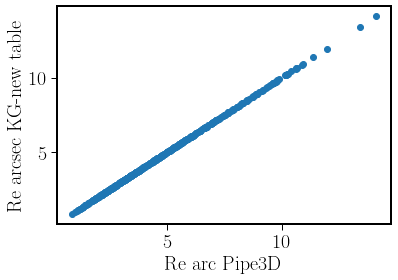

In [15]:
plt.scatter(tab_all['Re_arc'],tab_all['Re_arcsec'])
plt.xlabel('Re arc Pipe3D')
plt.ylabel('Re arcsec KG-new table')

In [232]:
mask_Re_out = (tab_all['Re_arc']<0)
tab_all['name','cubename','Re_arc','Re_arcsec'][mask_Re_out]

name,cubename,Re_arc,Re_arcsec
bytes17,bytes17,float64,float64
SAMI202531,KG-SAMI-202531,-99.0,1.8116695
SAMI319018,KG-SAMI-319018,-99.0,4.5835147
SAMI549182,KG-SAMI-549182,-99.0,4.020256
SAMI202398,KG-SAMI-202398,-99.0,2.730789


In [233]:
dist = np.abs(tab_all['Re_arc']-tab_all['Re_arcsec'])
mask_Re_off = (dist>0.1)
tab_all['name','cubename','Re_arc','Re_arcsec'][mask_Re_off]

name,cubename,Re_arc,Re_arcsec
bytes17,bytes17,float64,float64
SAMI205168,KG-SAMI-205168,1.8666542,1.2582887
SAMI210070,KG-SAMI-210070,1.3527768,1.0875593
SAMI205166,KG-SAMI-205166,1.9524992,1.721646
SAMI601018,KG-SAMI-601018,1.9083999,1.4358025
SAMI575097,KG-SAMI-575097,3.0281065,3.374811
...,...,...,...
SAMI545986,KG-SAMI-545986,10.192455,8.838657
SAMI487019,KG-SAMI-487019,7.261357,8.494784
SAMI487027,KG-SAMI-487027,7.473093,8.047844


In [234]:
print(np.array(tab_all['name'][mask_Re_off]))

[b'SAMI205168' b'SAMI210070' b'SAMI205166' b'SAMI601018' b'SAMI575097'
 b'SAMI197866' b'SAMI204832' b'SAMI218713' b'SAMI302810' b'SAMI594049'
 b'SAMI93020' b'SAMI92944' b'SAMI593680' b'SAMI93604' b'SAMI107214'
 b'SAMI93023' b'SAMI78827' b'SAMI509075' b'SAMI240432' b'SAMI63302'
 b'SAMI485882' b'SAMI485919' b'SAMI485924' b'SAMI619095' b'SAMI346046'
 b'SAMI323575' b'SAMI278846' b'SAMI278773' b'SAMI550330' b'SAMI203729'
 b'SAMI371889' b'SAMI202531' b'SAMI549313' b'SAMI214860' b'SAMI371976'
 b'SAMI301381' b'SAMI346752' b'SAMI346793' b'SAMI514022' b'SAMI618144'
 b'SAMI463641' b'SAMI460767' b'SAMI319018' b'SAMI91627' b'SAMI618152'
 b'SAMI62244' b'SAMI485688' b'SAMI278840' b'SAMI323577' b'SAMI371170'
 b'SAMI376033' b'SAMI323855' b'SAMI623144' b'SAMI418693' b'SAMI372384'
 b'SAMI324323' b'SAMI601102' b'SAMI376990' b'SAMI601013' b'SAMI600929'
 b'SAMI536625' b'SAMI622084' b'SAMI208520' b'SAMI209279' b'SAMI301201'
 b'SAMI204096' b'SAMI543797' b'SAMI15847' b'SAMI319397' b'SAMI227961'
 b'SAMI463367' 

In [235]:
mask_manga = np.array(["manga" in name.lower() for name in tab_all['name']])
mask_sami = np.array(["SAMI" in name.lower() for name in tab_all['name']])


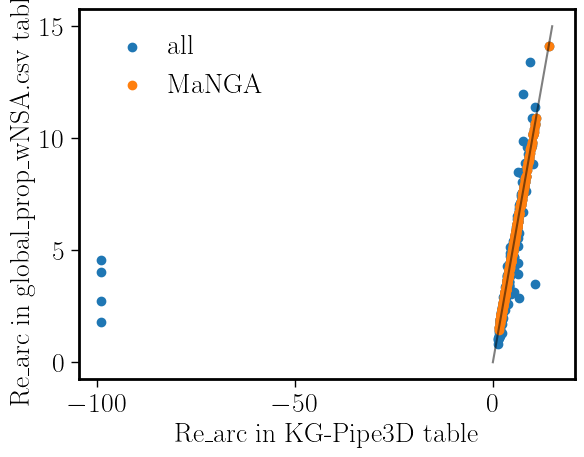

In [236]:
plt.scatter(tab_all['Re_arc'],tab_all['Re_arcsec'],label='all')
plt.scatter(tab_all['Re_arc'][mask_manga],tab_all['Re_arcsec'][mask_manga],label='MaNGA')
plt.xlabel('Re_arc in KG-Pipe3D table')
plt.ylabel('Re_arc in global_prop_wNSA.csv table')
plt.legend()
plt.plot([0,15],[0,15],alpha=0.5,color='black')



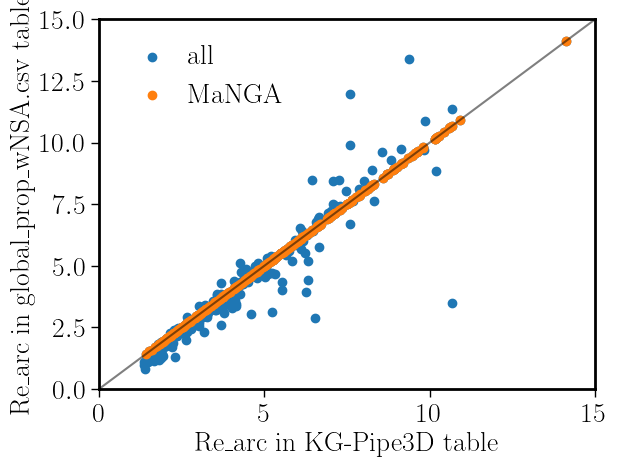

In [237]:
plt.scatter(tab_all['Re_arc'],tab_all['Re_arcsec'],label='all')
plt.scatter(tab_all['Re_arc'][mask_manga],tab_all['Re_arcsec'][mask_manga],label='MaNGA')
plt.xlabel('Re_arc in KG-Pipe3D table')
plt.ylabel('Re_arc in global_prop_wNSA.csv table')
plt.legend()
plt.xlim(0,15)
plt.ylim(0,15)
plt.plot([0,15],[0,15],alpha=0.5,color='black')

(0.0, 1.05)

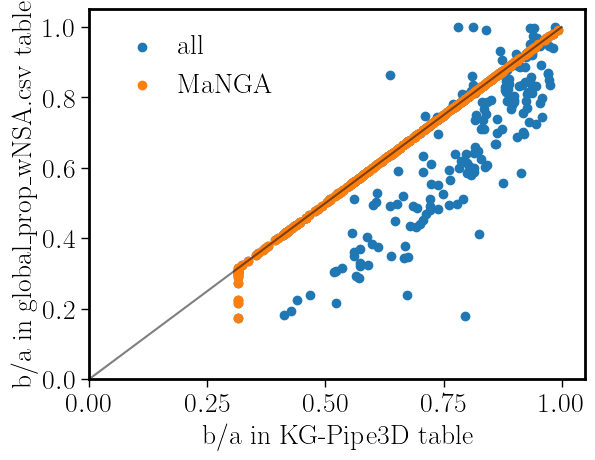

In [238]:
ba_old = np.sqrt(1-tab_all['ellip']**2)
plt.scatter(ba_old,tab_all['ba'],label='all')
plt.scatter(ba_old[mask_manga],tab_all['ba'][mask_manga],label='MaNGA')
plt.plot([0,1],[0,1],alpha=0.5,color='black')
plt.xlabel('b/a in KG-Pipe3D table')
plt.ylabel('b/a in global_prop_wNSA.csv table')
plt.legend()
plt.xlim(0,1.05)
plt.ylim(0,1.05)
#plt.plot([0,15],[0,15],alpha=0.5,color='black')


In [239]:
tab_all_sel

KGAS_ID,cubename,IAUNAME,SURVEY,redshift,ba,sersic_n,Re_arcsec,Re_kpc
int64,bytes17,bytes20,str5,float64,float64,float64,float64,float64
1,KG-MaNGA-1-178894,J205821.15-002104.10,MANGA,0.05285385251045227,0.7527944445610046,4.8857927322387695,2.3203279972076416,2.3894816308497533
2,KG-MaNGA-1-179173,J205812.81-001927.80,MANGA,0.05263899639248848,0.536220908164978,3.9337363243103027,2.7642130851745605,2.83574459125737
3,KG-MaNGA-1-179071,J205502.11-000223.89,MANGA,0.05249365046620369,0.7741591930389404,3.06891131401062,6.151388645172119,6.2942295457897615
4,KG-MaNGA-1-178794,J204331.88+005748.17,MANGA,0.05088929086923599,0.6266972422599792,3.1010689735412598,2.14782452583313,2.134578917088053
5,KG-MaNGA-1-54940,J093808.81+012656.98,MANGA,0.04578400030732155,0.673568606376648,0.5494298338890076,5.082827568054199,4.572304847673783
...,...,...,...,...,...,...,...,...
448,KG-MaNGA-1-383612,J080911.04+193938.38,MANGA,0.043528392910957336,0.9676048159599304,6.0,2.5128538608551025,2.154866107491772
449,KG-MaNGA-1-383608,J080924.54+193741.52,MANGA,0.04467571899294853,0.7487884163856506,3.136979341506958,2.537806987762451,2.2305814796578227
450,KG-MaNGA-1-383040,J080918.92+182415.84,MANGA,0.044506244361400604,0.7364318370819092,0.824587345123291,5.7109808921813965,5.001578567800633


In [ ]:
tab_Re = ascii.read('tables/KILOGAS_global_catalog_SAMImeasures.csv')
print(len(tab_Re))
tab_Re =  drop_later_duplicates_keep_first(tab_Re,'KGAS_ID')
print(len(tab_Re))


In [147]:
tab_all_sel.write('tables/global_prop_wNSA_cubes.csv',overwrite=True,delimiter=',')
print(len(tab_all_sel))

460


In [148]:
#
# Reading get_proc_elines table!
# 
get_proc_elines= "tables/get_proc_elines_SAMI_KG.csv"
col_proc_elines=header_columns(get_proc_elines,2)
tab_pe_SAMI=ascii.read(get_proc_elines, delimiter=',', guess=True, comment='\s*#', names=col_proc_elines,\
                      fill_values=[('BAD', np.nan)])

tab_pe_SAMI['name']

SAMI107214
SAMI15847
SAMI16026
SAMI16487
SAMI197866
SAMI202398
SAMI202399
...
SAMI91689
SAMI92944
SAMI93020


(0.0, 50.0)

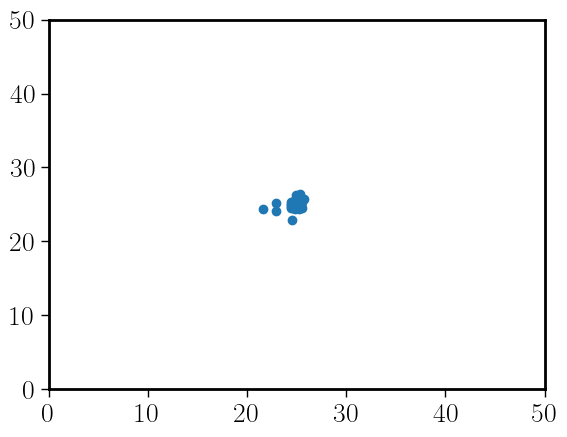

In [149]:
plt.scatter(tab_pe_SAMI['XC'],tab_pe_SAMI['YC'])
plt.xlim(0,50)
plt.ylim(0,50)


In [150]:
search_col(tab_pe,'X_C')

In [151]:
list_columns(tab_pe.colnames)

name                                a_ZH_T70                            flux_[NeIII]3967.46_Re_fit          e_OH_Pil11_NS_alpha_fit             
cubename                            T80                                 e_flux_[NeIII]3967.46_Re_fit        OH_Cur20_RS32_Re_fit                
KGAS_ID                             ZH_T80                              flux_[NeIII]3967.46_alpha_fit       e_OH_Cur20_RS32_Re_fit              
IAUNAME                             ZH_Re_T80                           e_flux_[NeIII]3967.46_alpha_fit     OH_Cur20_RS32_alpha_fit             
FoV                                 a_ZH_T80                            flux_CaII3968.47_Re_fit             e_OH_Cur20_RS32_alpha_fit           
Re_kpc                              T90                                 e_flux_CaII3968.47_Re_fit           OH_Cur20_R3_Re_fit                  
e_log_Mass                          ZH_T90                              flux_CaII3968.47_alpha_fit          e_OH_Cur20_R3_Re_fit  

In [152]:
tab_pe_MaNGA = Table.read('tables/SDSS17Pipe3D_v3_1_1.fits')

In [153]:
search_col(tab_pe_MaNGA,'ra')

objra


In [154]:
search_col(tab_pe,'ra')

454
451


In [241]:
tab_OH_cen = Table.read('tables/tab_OH_cen.ecsv')
for name in tab_OH_cen.colnames:
    tab_OH_cen.rename_column(name, f"{name}_cen")
tab_OH_cen.rename_column('KGAS_ID_cen','KGAS_ID')
tab_OH_cen.rename_column('cubename_cen','cubename')
tab_OH_cen =  drop_later_duplicates_keep_first(tab_OH_cen,'cubename')

In [242]:
tab_OH_FoV = Table.read('tables/tab_OH_FoV.ecsv')
for name in tab_OH_FoV.colnames:
    tab_OH_FoV.rename_column(name, f"{name}_FoV")
tab_OH_FoV.rename_column('KGAS_ID_FoV','KGAS_ID')
tab_OH_FoV.rename_column('cubename_FoV','cubename')
tab_OH_FoV =  drop_later_duplicates_keep_first(tab_OH_FoV,'cubename')

In [243]:
tab_OH_Re = Table.read('tables/tab_OH_Re.ecsv')
for name in tab_OH_Re.colnames:
    tab_OH_Re.rename_column(name, f"{name}_Re")
tab_OH_Re.rename_column('KGAS_ID_Re','KGAS_ID')
tab_OH_Re.rename_column('cubename_Re','cubename')
tab_OH_Re =  drop_later_duplicates_keep_first(tab_OH_Re,'cubename')

In [244]:
tab_OH_cen['KGAS_ID'] = tab_OH_cen['KGAS_ID'].astype('int')
tab_OH_FoV['KGAS_ID'] = tab_OH_FoV['KGAS_ID'].astype('int')
tab_OH_Re['KGAS_ID'] = tab_OH_Re['KGAS_ID'].astype('int')


In [245]:
#np.array(tab_OH_cen['KGAS_ID'])

In [246]:
tab_all_OH=join(tab_pe,tab_OH_cen,keys=['KGAS_ID','cubename'],join_type='left')
tab_all_OH=join(tab_all_OH,tab_OH_FoV,keys=['KGAS_ID','cubename'],join_type='left')
tab_all_OH=join(tab_all_OH,tab_OH_Re,keys=['KGAS_ID','cubename'],join_type='left')


In [247]:
print(len(tab_pe))
print(len(tab_OH_cen))
print(len(tab_OH_FoV))
print(len(tab_all_OH))


451
451
451
451


In [172]:
search_col(tab_OH_cen,'Cur20_O3N2')


OH_Cur20_O3N2_cen
e_OH_Cur20_O3N2_cen


In [173]:
search_col(tab_pe,'Cur20_O3N2')

OH_Cur20_O3N2_Re_fit
e_OH_Cur20_O3N2_Re_fit
OH_Cur20_O3N2_alpha_fit
e_OH_Cur20_O3N2_alpha_fit


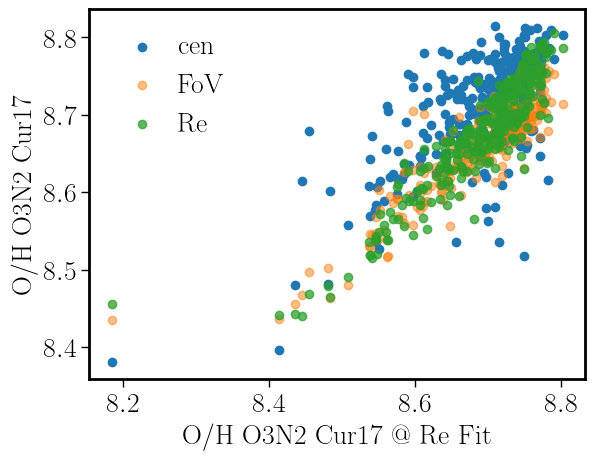

In [254]:
plt.scatter(tab_all_OH['OH_Cur20_O3N2_Re_fit'],tab_all_OH['OH_Cur20_O3N2_cen'],label='cen',edgecolor=None)
plt.scatter(tab_all_OH['OH_Cur20_O3N2_Re_fit'],tab_all_OH['OH_Cur20_O3N2_FoV'],label='FoV',edgecolor=None,alpha=0.5)
plt.scatter(tab_all_OH['OH_Cur20_O3N2_Re_fit'],tab_all_OH['OH_Cur20_O3N2_Re'],label='Re',edgecolor=None,alpha=0.75)
plt.xlabel('O/H O3N2 Cur17 @ Re Fit')
plt.ylabel('O/H O3N2 Cur17')
plt.legend()

In [250]:
tab_sel = tab_all_OH['KGAS_ID','cubename','OH_Cur20_O3N2_cen','e_OH_Cur20_O3N2_cen',\
                     'OH_Cur20_O3N2_Re','e_OH_Cur20_O3N2_Re',\
                     'OH_Cur20_O3N2_FoV','e_OH_Cur20_O3N2_FoV',\
                     'OH_Cur20_O3N2_Re_fit','e_OH_Cur20_O3N2_Re_fit',\
                     'OH_Cur20_O3N2_alpha_fit','e_OH_Cur20_O3N2_alpha_fit']
tab_sel.rename_columns(['OH_Cur20_O3N2_cen','e_OH_Cur20_O3N2_cen',\
                        'OH_Cur20_O3N2_Re','e_OH_Cur20_O3N2_Re',\
                     'OH_Cur20_O3N2_FoV','e_OH_Cur20_O3N2_FoV',\
                     'OH_Cur20_O3N2_Re_fit','e_OH_Cur20_O3N2_Re_fit',\
                     'OH_Cur20_O3N2_alpha_fit','e_OH_Cur20_O3N2_alpha_fit'],
                     ['OH_cen','e_OH_cen',\
                     'OH_Re','e_OH_Re',\
                     'OH_FoV','e_OH_FoV',\
                     'OH_Re_fit','e_OH_Re_fit',\
                     'slope_OH','e_slope_OH'],)
print(len(tab_sel))
tab_sel.write('tables/OH_Cur17_O3N2.ecsv',overwrite=True,delimiter=',')

451


In [252]:
tab_sel.write('tables/OH_Cur17_O3N2.fits')

Text(0, 0.5, 'O/H O3N2 Mar13 @ cen')

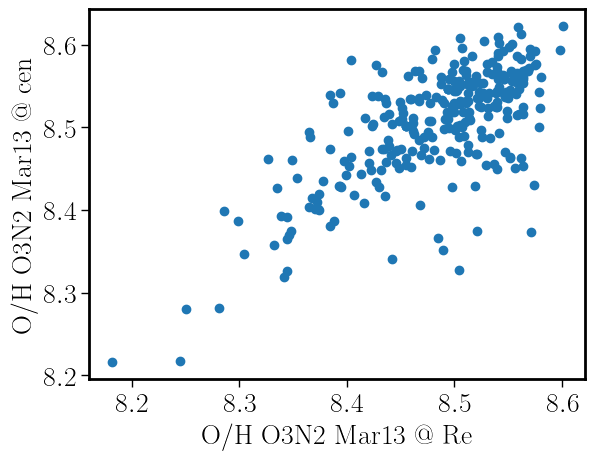

In [105]:
plt.scatter(tab_all_OH['OH_Mar13_O3N2_Re_fit'],tab_all_OH['OH_Mar13_O3N2_cen'])
plt.xlabel('O/H O3N2 Mar13 @ Re')
plt.ylabel('O/H O3N2 Mar13 @ cen')


In [107]:
print(len(tab_OH_cen))

457


Text(0, 0.5, 'O/H N2 Mar13 @ cen')

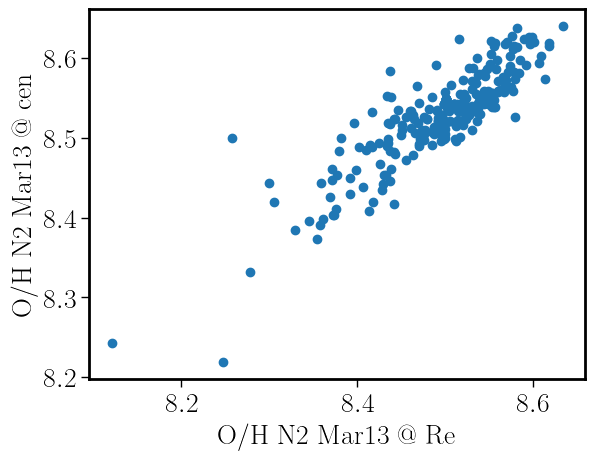

In [108]:
plt.scatter(tab_all_OH['OH_Mar13_N2_Re_fit'],tab_all_OH['OH_Mar13_N2_cen'])
plt.xlabel('O/H N2 Mar13 @ Re')
plt.ylabel('O/H N2 Mar13 @ cen')
